In [1]:
# import libraries that will be used
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# upload datasets into pandas dataframe
ratings = pd.read_csv('/content/drive/MyDrive/BATOURS/tourism_rating.csv', sep=',', error_bad_lines=False, encoding="latin-1")
places = pd.read_csv('/content/drive/MyDrive/BATOURS/tourism_with_id.csv', sep=',', error_bad_lines=False, encoding="latin-1")

<ipython-input-3-3de295379914>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('/content/drive/MyDrive/BATOURS/tourism_rating.csv', sep=',', error_bad_lines=False, encoding="latin-1")
<ipython-input-3-3de295379914>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  places = pd.read_csv('/content/drive/MyDrive/BATOURS/tourism_with_id.csv', sep=',', error_bad_lines=False, encoding="latin-1")


In [ ]:
# see the first 5 data from the datasets

In [4]:
places.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
ratings.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [6]:
# merge the places and ratings dataframe, and then choose only when City is Bandung
merged_df = pd.merge(ratings, places, on='Place_Id')
merged_df = merged_df[merged_df['City']=='Bandung']
merged_df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
134,1,312,2,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5,90.0,"{'lat': -6.8585841, 'lng': 107.6306089}",-6.858584,107.630609,NaN,312
135,4,312,3,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5,90.0,"{'lat': -6.8585841, 'lng': 107.6306089}",-6.858584,107.630609,NaN,312
136,12,312,5,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5,90.0,"{'lat': -6.8585841, 'lng': 107.6306089}",-6.858584,107.630609,NaN,312
137,28,312,5,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5,90.0,"{'lat': -6.8585841, 'lng': 107.6306089}",-6.858584,107.630609,NaN,312
138,32,312,5,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5,90.0,"{'lat': -6.8585841, 'lng': 107.6306089}",-6.858584,107.630609,NaN,312


In [7]:
# drop the unnecessary columns
columns_drop = ['Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12']
merged_df.drop(columns_drop, axis=1, inplace=True)
merged_df.head()

,User_Id,Place_Id,Place_Ratings
134,1,312,2
135,4,312,3
136,12,312,5
137,28,312,5
138,32,312,5


In [8]:
# make list for unique user ID
user_ids = merged_df["User_Id"].unique().tolist()

# encode every unique user ID to a value
user_encoder = {x: i for i, x in enumerate(user_ids)}

# decode the encoded value to be the original user ID
user_decoder = {i: x for i, x in enumerate(user_ids)}

# make list for unique place ID
place_ids = merged_df["Place_Id"].unique().tolist()

# encode every unique place ID to a value
place_encoder = {x: i for i, x in enumerate(place_ids)}

# decode the encoded value to be the original place ID
place_decoder = {i: x for i, x in enumerate(place_ids)}

# make new column that store the encoded value of user ID and place ID
merged_df["user"] = merged_df["User_Id"].map(user_encoder)
merged_df["place"] = merged_df["Place_Id"].map(place_encoder)

# make new column to ensures the rating are represented as 32-bit floating-point numbers
merged_df["rating"] = merged_df["Place_Ratings"].values.astype(np.float32)

num_users = len(user_encoder)
num_places = len(place_decoder)
lowest_rating = min(merged_df["rating"])
highest_rating = max(merged_df["rating"])

print(
    "Number of users: {}, Number of Places: {}, Lowest rating: {}, Highest rating: {}".format(
        num_users, num_places, lowest_rating, highest_rating
    )
)

Number of users: 300, Number of Places: 124, Lowest rating: 1.0, Highest rating: 5.0


In [10]:
# shuffle all rows with random seed 42
merged_df = merged_df.sample(frac=1, random_state=42)

# store the user and place combination features to x
x = merged_df[["user", "place"]].values

# store the scaled rating values label using min-max normalization to y
y = merged_df["rating"].apply(lambda x: (x - lowest_rating) / (highest_rating - lowest_rating)).values

# split the data to training and validation sets
train_indices = int(0.7 * merged_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [11]:
EMBEDDING_SIZE = 50

# recommender system model from keras.Model
class RecommenderNet(keras.Model):
    # create embedding layers for users and places
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super().__init__(**kwargs)
        # parameters
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size
        # user embedding layer
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # user bias layer
        self.user_bias = layers.Embedding(num_users, 1)
        # placer embedding layer
        self.place_embedding = layers.Embedding(
            num_places,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # place bias layer
        self.place_bias = layers.Embedding(num_places, 1)
    # forward pass
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])
        # dot product between user vector and place vector
        dot_user_place = tf.tensordot(user_vector, place_vector, 2)
        # Add all the components, including bias
        x = dot_user_place + user_bias + place_bias
        # Use sigmoid activation function to forces the rating between 0 and 1
        return tf.nn.sigmoid(x)

# recommender system model
model = RecommenderNet(num_users, num_places, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [14]:
# train model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/10
63/63 [==============================] - 0s 4ms/step - loss: 0.6985 - val_loss: 0.7217
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.6874 - val_loss: 0.7208
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.6864 - val_loss: 0.7186
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.6798 - val_loss: 0.7181
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6831 - val_loss: 0.7178
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6785 - val_loss: 0.7183
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6804 - val_loss: 0.7178
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.6797 - val_loss: 0.7182
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6787 - val_loss: 0.7176
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6742 - val_loss: 0.7182


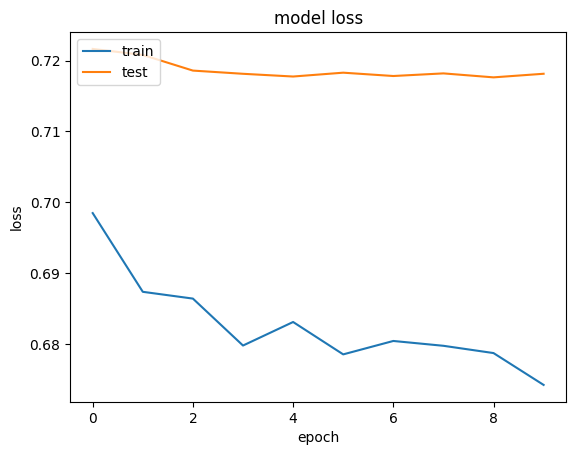

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [19]:
# selects random user ID
user_id = merged_df.User_Id.sample(1).iloc[0]

# places already visited by the selected user
places_visited = merged_df[merged_df.User_Id == user_id]

# places not visited yet by the selected user
places_not_visited = places[
    ~places["Place_Id"].isin(places_visited.Place_Id.values)
]["Place_Id"]

# ensures only places which embedding is available are considered for recommendation
places_not_visited = list(
    set(places_not_visited).intersection(set(place_encoder.keys()))
)
places_not_visited = [[place_encoder.get(x)] for x in places_not_visited]

# encoded value of the selected user
user_encoded_value = user_encoder.get(user_id)

# user-place combination array
user_place_array = np.hstack(
    ([[user_encoded_value]] * len(places_not_visited), places_not_visited)
)

# predict the rating
ratings = model.predict(user_place_array).flatten()

# sort the rating highest to lowest
top_ratings_indices = ratings.argsort()[-10:][::-1]

# list of recommended place from encoded value
recommended_place_ids = [
    place_decoder.get(places_not_visited[x][0]) for x in top_ratings_indices
]

4/4 [==============================] - 0s 2ms/step


In [25]:
print("Top 10 place recommendations for user-{}:\n".format(user_id))
recommended_places = places[places["Place_Id"].isin(recommended_place_ids)]
i = 1
for row in recommended_places.itertuples():
    print(i, row.Place_Name, "-", row.Category)
    i += 1

Top 10 place recommendations for user-141:

1 Curug Tilu Leuwi Opat - Cagar Alam
2 Upside Down World Bandung - Taman Hiburan
3 Taman Lansia - Taman Hiburan
4 Kampoeng Tulip - Taman Hiburan
5 Selasar Sunaryo Art Space - Taman Hiburan
6 Ciwangun Indah Camp Official - Cagar Alam
7 Curug Batu Templek - Cagar Alam
8 Museum Mandala Wangsit Siliwangi - Budaya
9 Peta Park - Taman Hiburan
10 Masjid Agung Trans Studio Bandung - Tempat Ibadah
